In [98]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from scipy import stats 
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score,r2_score,classification_report
from sklearn.model_selection import GridSearchCV

Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and 
assign it to a variable. 1 pts Python Pandas functions
Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame 
and assign it to a variable. 1 pts Python Pandas functions
Part 1.1 c - Merge both the DataFrames together to 
form a single DataFrame 

In [99]:
carname=pd.read_csv(r'C:\Personal\AI\UnSupervised\Project\Car name.csv')

In [100]:
carattr= pd.read_json(r'C:\Personal\AI\UnSupervised\Project\Car-Attributes.json', orient='records')

In [101]:
carattr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [102]:
car= pd.concat([carname, carattr], axis=1, join='inner')

In [103]:
car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [104]:
for column in car:
    print(column)
    print(car[column].unique())
    print("   ")


car_name
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 'd

Part 1.1 d - Print 5 point summary of the numerical 
features and share insights.

In [105]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [106]:
car = car.replace('?', np.nan)

Part 1.2 a - Check and print feature-wise percentage of 
missing values present in the data and impute with the 
best suitable approach.

In [107]:
car.isna().mean().round(4) * 100

car_name    0.00
mpg         0.00
cyl         0.00
disp        0.00
hp          1.51
wt          0.00
acc         0.00
yr          0.00
origin      0.00
dtype: float64

In [108]:
car['hp'].fillna((car['hp'].median()), inplace=True)
car.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

Part 1.2 b - Check for duplicate values in the data and 
impute with the best suitable approach. 

In [109]:
car.duplicated().sum()

0

part 1.2 c - Plot a pairplot for all features.

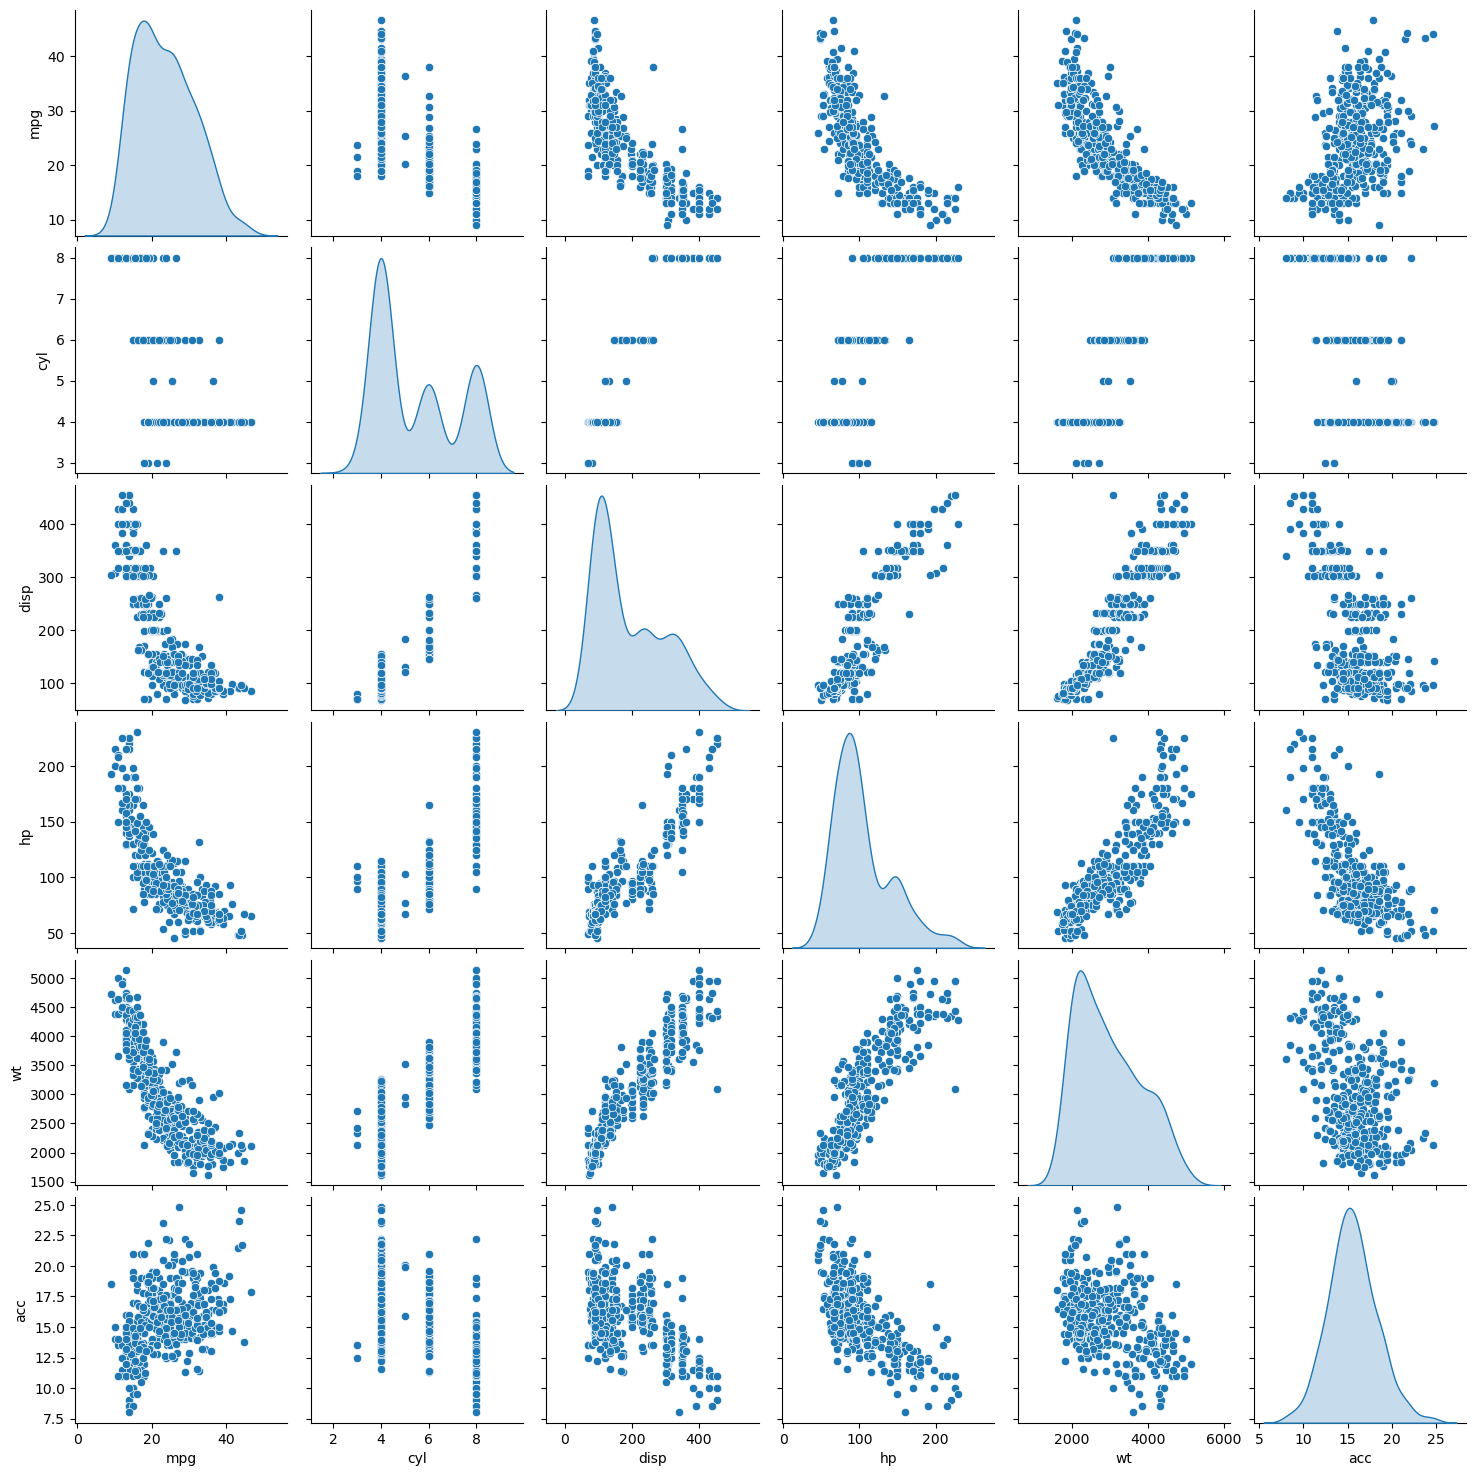

In [110]:
car_attr = car.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. 
Datapoints should be distinguishable by ‘cyl’.

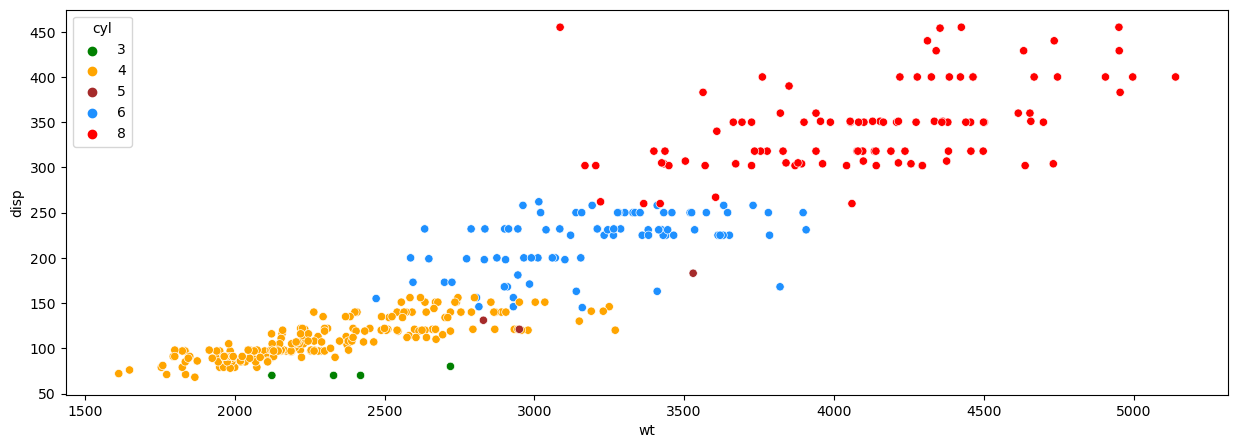

In [111]:
figure = plt.figure(figsize=(15,5))
sns.scatterplot(x='wt',y='disp', data=car, hue = "cyl",palette=['green','orange','brown','dodgerblue','red'])
plt.show()

Part 1.2 e - Share insights for Q2.d. 

We can see as the cylinder is increased the positive correlation of displacement and weight is also postively correlated. We can also see for cyl=8 there are some outliners.

Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. 
Datapoints should be distinguishable by ‘cyl’.

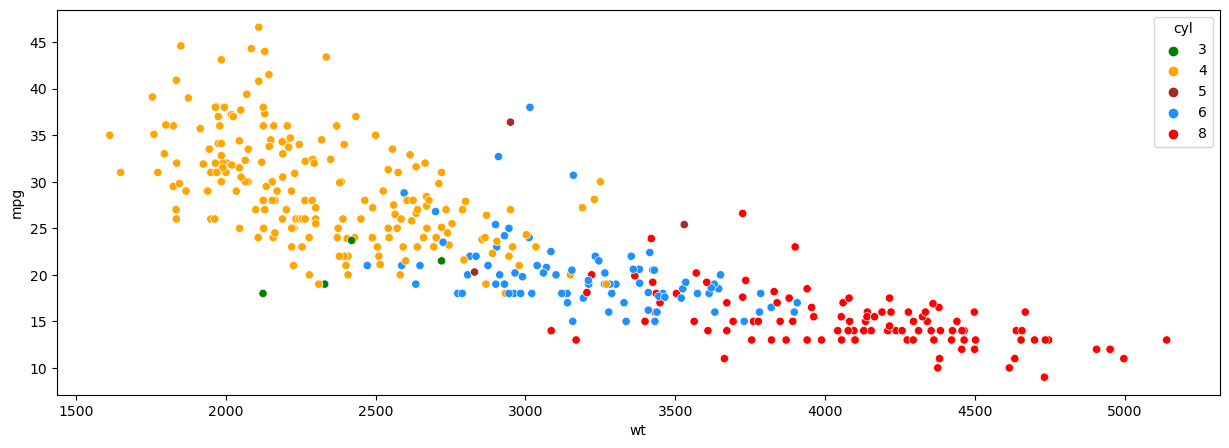

In [112]:
figure = plt.figure(figsize=(15,5))
sns.scatterplot(x='wt',y='mpg', data=car, hue = "cyl",palette=['green','orange','brown','dodgerblue','red'])
plt.show()

Part 1.2 g- Share insights for Q2.f.

there is the negative correlation between weight and mpg, increase with cylinder the negative correlation also increased.

Part 1.2 h - Check for unexpected values in all the 
features and datapoints with such values. 

In [113]:
car_attr=car_attr.select_dtypes(exclude=['object'])

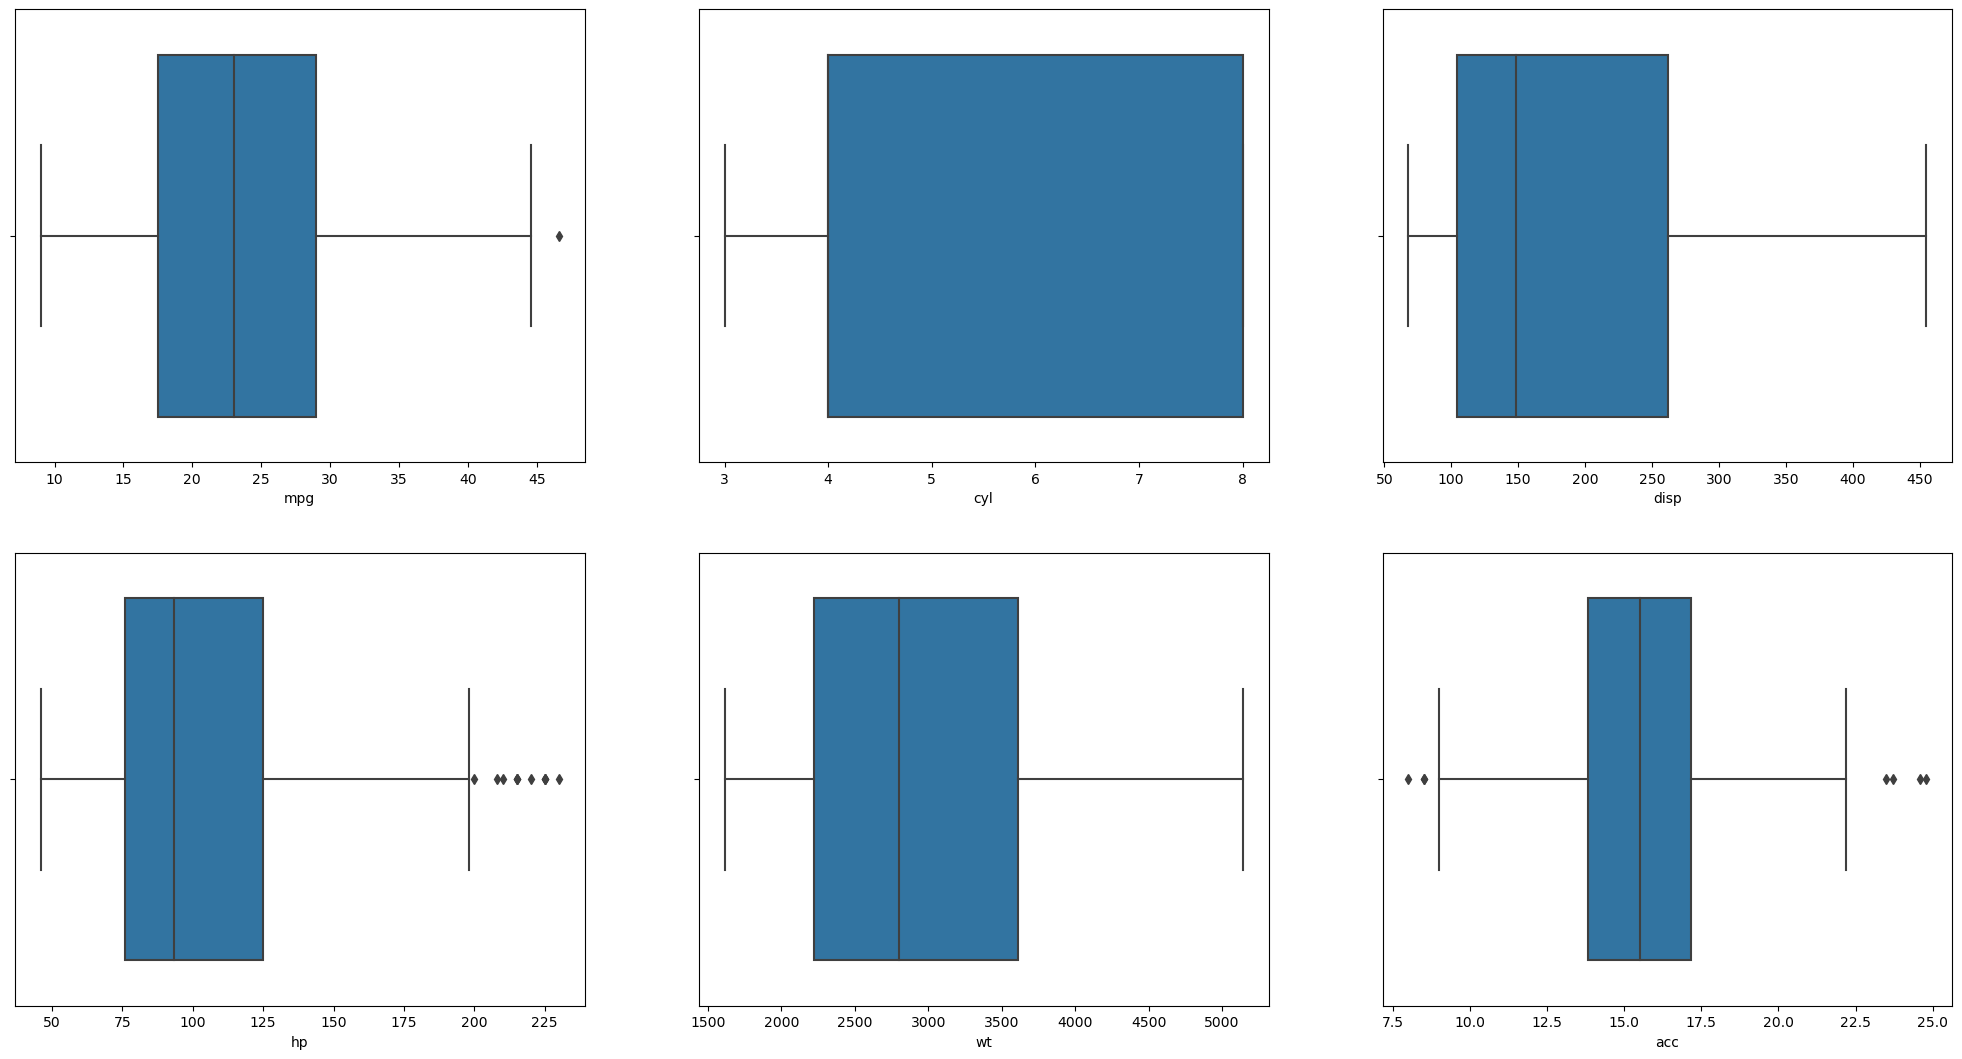

In [114]:

plt.figure(figsize=(25, 20))
col = 1
for i in car_attr.columns:
    plt.subplot(3, 3, col)
    sns.boxplot(data=car_attr, x=car_attr[i])
    col += 1

In [115]:
IQR1 = stats.iqr(car['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(car['acc'], interpolation = 'midpoint')
IQR3 = stats.iqr(car['mpg'], interpolation = 'midpoint')

hp after Imputing

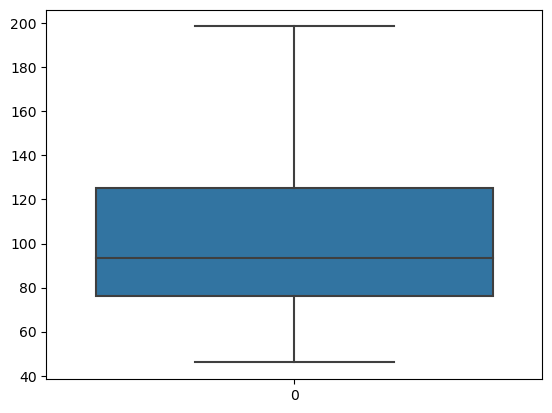

In [116]:
Q3 = car['hp'].quantile(0.75)
car['hp'] = np.where(car["hp"] >(Q3+1.5*IQR1), 198.5,car['hp'])
sns.boxplot(car['hp']);

Acc after Imputing

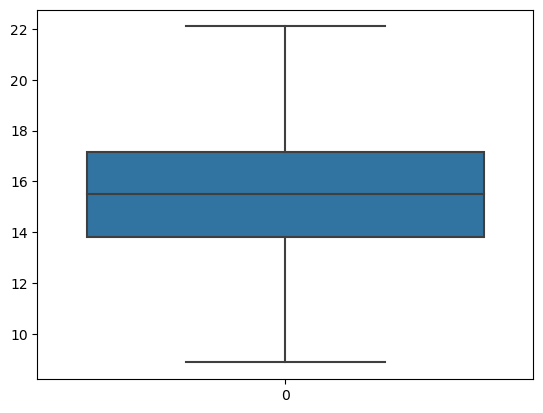

In [117]:
Q1 = car['acc'].quantile(0.25)
Q31=car['acc'].quantile(0.75)
car['acc'] = np.where(car["acc"] >(Q31+1.5*IQR2),22.10 ,car['acc'])
car['acc'] = np.where(car["acc"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),car['acc'])
sns.boxplot(car['acc']);

mpg after imputing

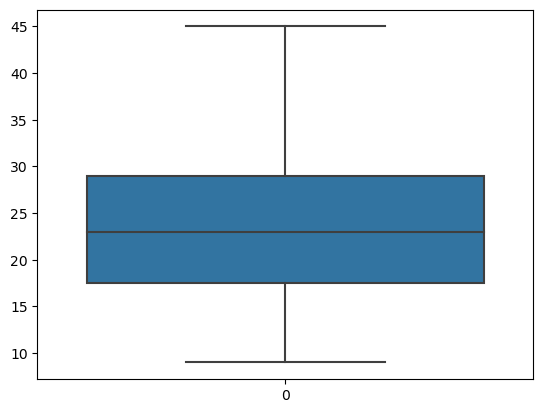

In [122]:
Q32 = car['mpg'].quantile(0.75)
car['mpg'] = np.where(car["mpg"] >(Q32+1.5*IQR3), 45,car['mpg'])
sns.boxplot(car['mpg']);

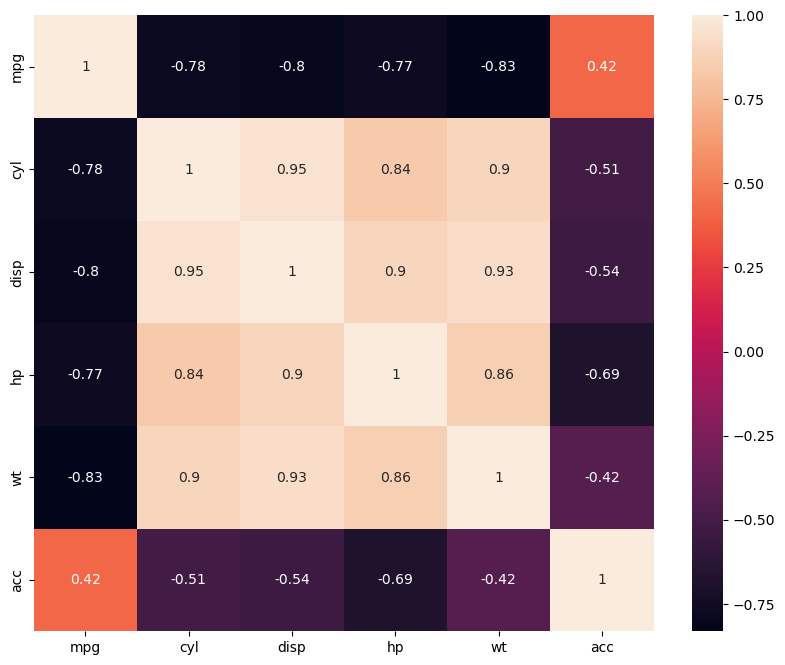

In [123]:
plt.figure(figsize=(10,8))
corr=car_attr.corr()
sns.heatmap(corr,annot=True);

Part 1.3 a - Apply K-Means clustering for 2 to 10 
clusters.

In [124]:
carzscore=car_attr.apply(zscore)
carzscore.head()

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117


In [125]:
wss =[] 
for i in range(2,10):
    KM = KMeans(n_clusters=i)
    KM.fit(carzscore)
    wss.append(KM.inertia_)
wss

[944.2899552779721,
 609.2653876220145,
 492.51941318174715,
 423.31646094410866,
 366.4719565310868,
 332.77384669328086,
 301.71115997802474,
 284.4100874914227]

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
X = StandardScaler()

In [128]:
car_scaled = X.fit_transform(car_attr)

In [129]:
wss =[] 
for i in range(2,10):
    KM = KMeans(n_clusters=i)
    KM.fit(car_scaled)
    wss.append(KM.inertia_)
wss

[944.2899552779721,
 609.2653876220145,
 492.564441251105,
 423.32381601919917,
 366.71853380315406,
 333.6362322979801,
 302.21281501388177,
 287.6257013608668]

Part 1.3 b - Plot a visual and find elbow point. 

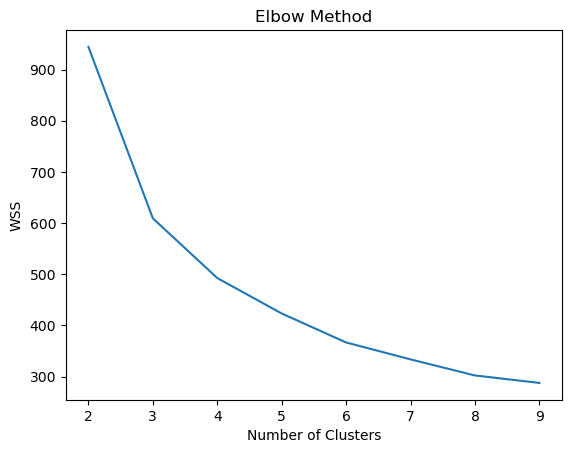

In [130]:
plt.plot(range(2,10), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

4 is the elbow point.

Part 1.3 c - On the above visual, highlight which are 
the possible Elbow points.

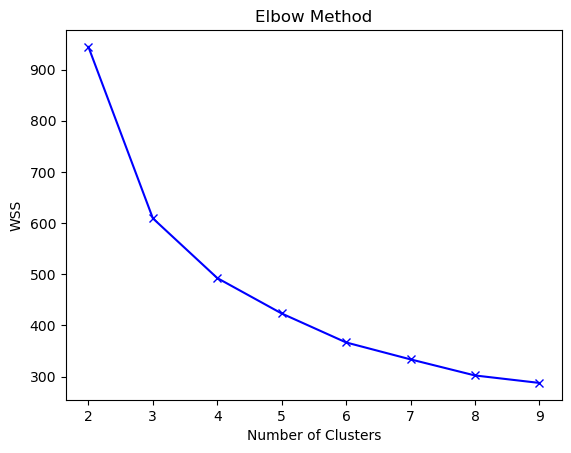

In [131]:
plt.plot(range(2,10), wss,'bx-');
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

Part 1.3 d - Train a K-means clustering model once 
again on the optimal number of clusters. 

In [132]:
k_means = KMeans(n_clusters = 3)
k_means.fit(car_scaled)
labels = k_means.labels_

In [133]:
silhouette_score(car_scaled,labels)

0.4400948250533319

In [134]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(car_scaled)
    score = silhouette_score(car_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

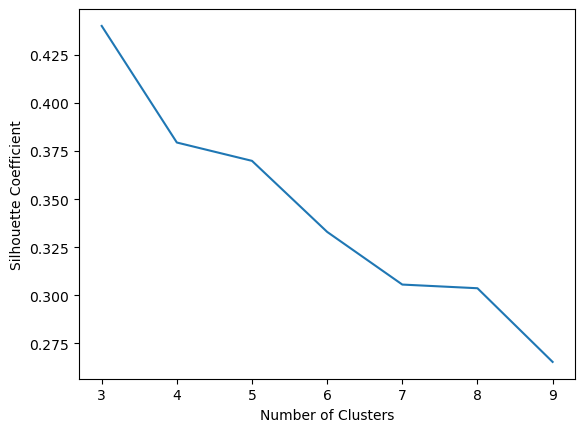

In [135]:
plt.plot(range(3, 10), silhouette_coefficients)
plt.xticks(range(3, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Part 1.3 e - Add a new feature in the DataFrame which 
will have labels based upon cluster value

In [136]:
car_attr["cluster_K"] = labels
car['cluster_K']=labels
Kclus=car_attr
Kclus.head()

,mpg,cyl,disp,hp,wt,acc,cluster_K
0,18.0,8,307.0,130.0,3504,12.0,2
1,15.0,8,350.0,165.0,3693,11.5,2
2,18.0,8,318.0,150.0,3436,11.0,2
3,16.0,8,304.0,150.0,3433,12.0,2
4,17.0,8,302.0,140.0,3449,10.5,2


In [137]:
car_attr.cluster_K.value_counts().sort_index()

0     94
1    207
2     97
Name: cluster_K, dtype: int64

art 1.3 f -Plot a visual and color the datapoints based 
upon clusters. 

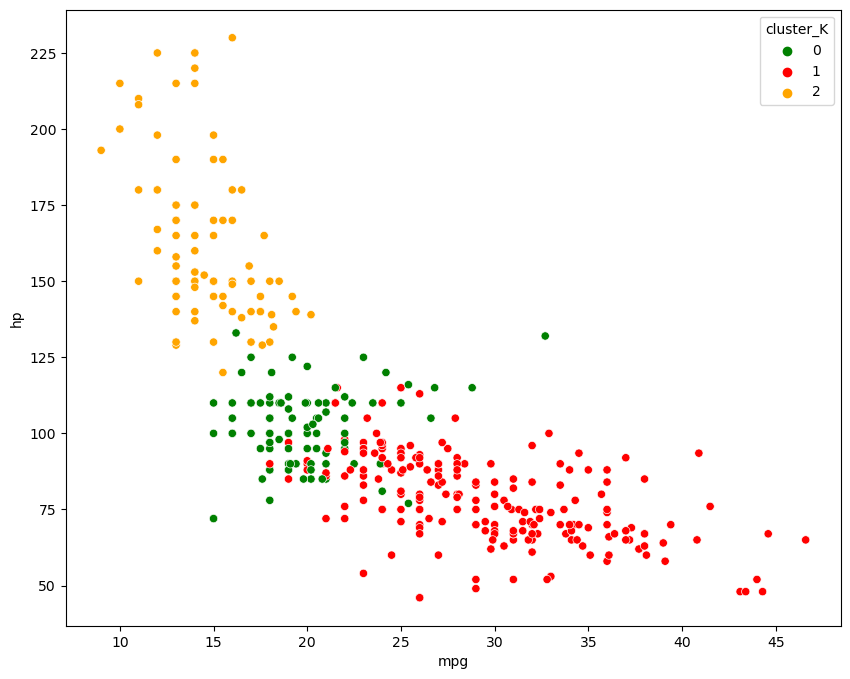

In [138]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=car_attr, 
                    palette=['green','red','orange']);

Part 1.3 g - Pass a new DataPoint and predict which 
cluster it belongs to.

In [139]:
aggdata=car_attr.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=car_attr.cluster_K.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,Freq
cluster_K,,,,,,,
0,19.826596,6.042553,218.095745,101.718085,3222.425532,16.396809,94
1,29.400000,4.004831,109.780193,78.533816,2306.067633,16.563285,207
2,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,97


Part 2. 1 a - Read ‘vehicle.csv’ and save as 
DataFrame.

In [140]:
vehicle=pd.read_csv(r'C:\Personal\AI\UnSupervised\Project\vehicle.csv')

In [141]:
vehicle.shape

(846, 19)

art 2.1 b- Check percentage of missing values and 
impute with correct approach.

In [142]:
vehicle.isna().mean().round(4) * 100

compactness                    0.00
circularity                    0.59
distance_circularity           0.47
radius_ratio                   0.71
pr.axis_aspect_ratio           0.24
max.length_aspect_ratio        0.00
scatter_ratio                  0.12
elongatedness                  0.12
pr.axis_rectangularity         0.35
max.length_rectangularity      0.00
scaled_variance                0.35
scaled_variance.1              0.24
scaled_radius_of_gyration      0.24
scaled_radius_of_gyration.1    0.47
skewness_about                 0.71
skewness_about.1               0.12
skewness_about.2               0.12
hollows_ratio                  0.00
class                          0.00
dtype: float64

In [143]:
for cols in vehicle.columns:
    if(cols != 'class'): 
        vehicle[cols] = vehicle[cols].fillna(vehicle[cols].median())

In [144]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [145]:
vehicle.isna().mean().round(4) * 100

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

Part 2.1 c- Visualize a Pie-chart and print percentage 
of values for variable ‘class’.

In [146]:
import plotly.express as px
df=(vehicle['class'].value_counts())
fig=px.pie(df, values='class', names=df.index, title='Class',hover_data=['class'])
fig.show()

Part 2.1 d - Check for duplicate rows in the data and 
impute with correct approach. 

In [147]:
vehicle[vehicle.duplicated()].shape[0]

0

NO Duplicate value

Part 2.2 a - Split data into X and Y.

In [148]:
X = vehicle.drop(columns=['class'])
y = vehicle['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

Part 2.2 b - Standardize the Data.

In [149]:
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


Part 2.3 a - Train a base Classification model using 
SVM. 

In [150]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

In [151]:
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [152]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))


0.9898648648648649
0.9763779527559056
              precision    recall  f1-score   support

         bus       1.00      0.97      0.99        71
         car       1.00      0.97      0.98       125
         van       0.91      1.00      0.95        58

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254



Part 2.3 c - Apply PCA on the data with 10 
components. 

In [153]:
pca10 = PCA(n_components=10)
pca10.fit(XScaled)
print(pca10.components_)
print(pca10.explained_variance_ratio_)
Xpca10 = pca10.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [154]:
print(pca10.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [155]:
print(pca10.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

Part 2.3 d - Visualize Cumulative Variance Explained 
with Number of Components.

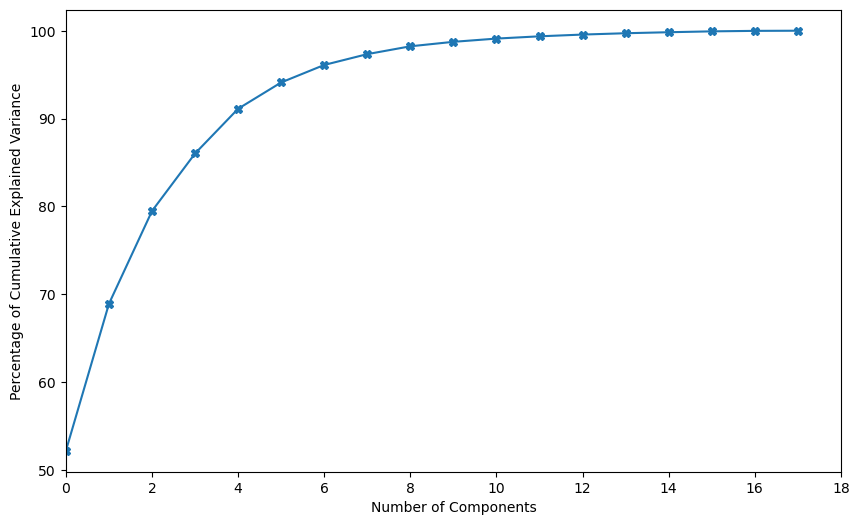

In [156]:
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (10, 6))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

In [157]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


Part 2.3 e - Draw a horizontal line on the above plot to 
highlight the threshold of 90%

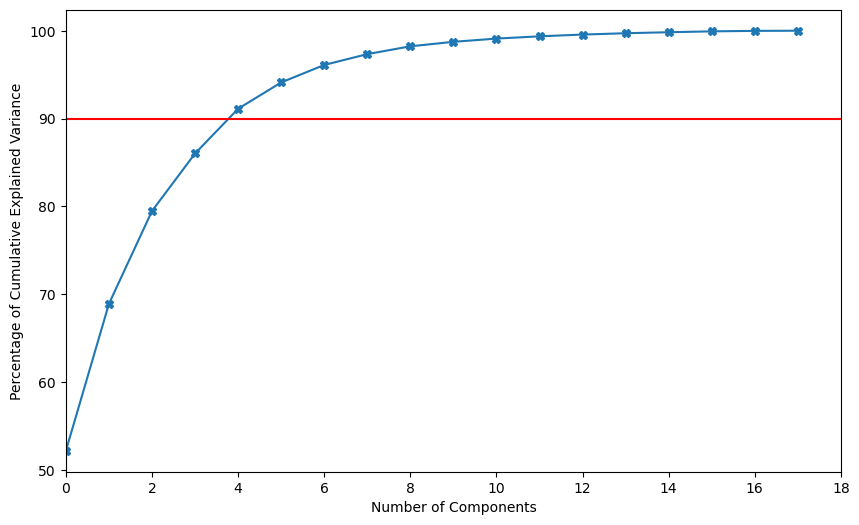

In [158]:
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (10, 6))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.axhline(y=90, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

From above plot, the first 4 component explains the 90% of variation, between first 3 components more than 89% of the information is captured.The above plot shows 90 % variance by the 4th components. we can drop above 4th component.

Part 2.3 f - Apply PCA on the data. This time Select 
Minimum Components with 90% or above variance 
explained.

In [159]:
pca4 = PCA(n_components=4)
pca4.fit(XScaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(XScaled)

[[ 0.27528369  0.29325847  0.30460913  0.26760688  0.08050399  0.09727569
   0.31709275 -0.31413315  0.31395906  0.2828309   0.30928036  0.31378846
   0.27204749 -0.02081377  0.04145551  0.05822502  0.03027951  0.07414539]
 [-0.12695376  0.12557673 -0.07295164 -0.18963438 -0.12217486  0.01074829
   0.04811814  0.01274985  0.05993525  0.11622053  0.06228062  0.05378436
   0.20923317  0.48852515 -0.05508997 -0.12408509 -0.54091477 -0.54035426]
 [-0.11992248 -0.02482055 -0.05601433  0.27507421  0.64201297  0.5918013
  -0.09762831  0.05764844 -0.10951242 -0.0170642   0.05632398 -0.10884073
  -0.03146365  0.28627701 -0.11567935 -0.07528289  0.00873592  0.03952427]
 [ 0.07838436  0.18733741 -0.07120084 -0.04260534  0.03272571  0.03141473
  -0.09574857  0.0822902  -0.0924583   0.18800561 -0.11984401 -0.09174493
   0.20009523 -0.06550513  0.60479425 -0.66611412  0.10552625  0.04748903]]
[0.52186034 0.16729768 0.10562639 0.0654746 ]


In [160]:
pca_4 = PCA(n_components = 4)
X_pca4 = pca_4.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca4.shape[1])

Original number of features: 18
Reduced number of features: 4


In [161]:
pca_df4 = pd.DataFrame(data = X_pca4)
pca_df4.head()

,0,1,2,3
0,0.334162,-0.219026,1.001584,0.176612
1,-1.591711,-0.420603,-0.369034,0.233234
2,3.769324,0.195283,0.087859,1.202212
3,-1.738598,-2.829692,0.109456,0.376685
4,0.558103,4.758422,11.703647,0.147464


 Part 2.3 g - Train SVM model on components selected 
from above step.

In [162]:
X_tr4, X_te4, y_tr4, y_te4 = train_test_split(pca_df4, y, test_size = 0.3, random_state = 10)

In [163]:
svc_model_pca4 = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca4.fit(X_tr4, y_tr4)

SVC(C=4)

Part 2.3 h - Print Classification metrics for train data of 
above model and share insights. 

In [164]:
print(svc_model_pca4.score(X_tr4, y_tr4))
print(svc_model_pca4.score(X_te4, y_te4))

y_pr4 = svc_model_pca4.predict(X_te4)
print(classification_report(y_te4, y_pr4))

0.8243243243243243
0.7952755905511811
              precision    recall  f1-score   support

         bus       0.89      0.69      0.78        71
         car       0.83      0.89      0.86       125
         van       0.64      0.72      0.68        58

    accuracy                           0.80       254
   macro avg       0.79      0.77      0.77       254
weighted avg       0.81      0.80      0.80       254



We can see if we consider 4 components we get 82% accuracy on train data and 79% of test data.

In [165]:
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074210e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [166]:
pca_6 = PCA(n_components = 6)
X_pca6 = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca6.shape[1])

Original number of features: 18
Reduced number of features: 6


In [167]:
pca_df6 = pd.DataFrame(data = X_pca6)
pca_df6.head()

,0,1,2,3,4,5
0,0.334162,-0.219026,1.001584,0.176612,0.079301,-0.757447
1,-1.591711,-0.420603,-0.369034,0.233234,0.693949,-0.517162
2,3.769324,0.195283,0.087859,1.202212,0.731732,0.705041
3,-1.738598,-2.829692,0.109456,0.376685,-0.362897,-0.484431
4,0.558103,4.758422,11.703647,0.147464,3.256953,-0.203446


 Part 2.3 g - Train SVM model on components selected 
from above step.

In [168]:
X_tr6, X_te6, y_tr6, y_te6 = train_test_split(pca_df6, y, test_size = 0.3, random_state = 10)

In [169]:
svc_model_pca6 = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca6.fit(X_tr6, y_tr6)

SVC(C=4)

Part 2.3 h - Print Classification metrics for train data of 
above model and share insights. 

In [170]:
print(svc_model_pca6.score(X_tr6, y_tr6))
print(svc_model_pca6.score(X_te6, y_te6))

y_pr6 = svc_model_pca6.predict(X_te6)
print(classification_report(y_te6, y_pr6))

0.9324324324324325
0.9133858267716536
              precision    recall  f1-score   support

         bus       0.95      0.89      0.92        71
         car       0.92      0.92      0.92       125
         van       0.86      0.93      0.89        58

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.92      0.91      0.91       254



If we consider 6 components which covers almost 95% of data, we get accracy of 93% on train and 91% on testing data, So, I have considered 6Components in the above dataset

Part 2.4 a - Train another SVM on the components out 
of PCA. Tune the parameters to improve performance

In [171]:
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(estimator=svc_model_pca4,param_grid = parameters,refit = True)
grid.fit(X_tr4, y_tr4)

GridSearchCV(estimator=SVC(C=4),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [172]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814243 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.570916 (0.027908) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.679106 (0.037406) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.770360 (0.025542) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.770303 (0.034154) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.689232 (0.029966) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.521977 (0.007322) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.734952 (0.038709) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.814243 (0.033558) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.714485 (0.033091) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.657143 (0.029977) with: {'C': 10, 'gamma': 0.001, 'kernel'

In [173]:
print(grid.score(X_tr4, y_tr4))
print(grid.score(X_te4, y_te4))

y_pr4 = grid.predict(X_te4)
print(classification_report(y_te4, y_pr4))


0.856418918918919
0.8070866141732284
              precision    recall  f1-score   support

         bus       0.91      0.70      0.79        71
         car       0.85      0.90      0.88       125
         van       0.64      0.72      0.68        58

    accuracy                           0.81       254
   macro avg       0.80      0.78      0.78       254
weighted avg       0.82      0.81      0.81       254



After Hypertuning the parameter using Grid search there is almost 3 % increase in the tarining data and 1 % increase in the Test data for 4 component data.

art 2.4 b- Share best Parameters observed from 
above step.

Best: 0.814243 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [174]:
grid6 = GridSearchCV(estimator=svc_model_pca6,param_grid = parameters,refit = True)
grid6.fit(X_tr6, y_tr6)

GridSearchCV(estimator=SVC(C=4),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [175]:
print("Best: %f using %s" % (grid6.best_score_, grid6.best_params_))
means = grid6.cv_results_['mean_test_score']
stds = grid6.cv_results_['std_test_score']
params = grid6.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.893605 using {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.527033 (0.004342) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.771956 (0.047929) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.782097 (0.053796) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.864891 (0.038913) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.798946 (0.049097) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.520282 (0.004969) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.513517 (0.003183) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.802379 (0.030302) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.876670 (0.022538) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.846247 (0.048753) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.771956 (0.050245) with: {'C': 10, 'gamma': 0.001, 'kern

In [176]:
print(grid6.score(X_tr6, y_tr6))
print(grid6.score(X_te6, y_te6))

y_pr6 = grid6.predict(X_te6)
print(classification_report(y_te6, y_pr6))

0.9510135135135135
0.9173228346456693
              precision    recall  f1-score   support

         bus       0.94      0.94      0.94        71
         car       0.93      0.91      0.92       125
         van       0.87      0.90      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.91       254
weighted avg       0.92      0.92      0.92       254



After hytpertuning for 6component , there is a 2 % increase in the training data but no significant change in the testing data.

Part 2.4 c- Print Classification metrics for train data of 
above model and share relative improvement in 
performance in all the models along with insights.

In [177]:
print("Train and testing Accuracy before PCA Applied")
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

Train and testing Accuracy before PCA Applied
0.9898648648648649
0.9763779527559056
              precision    recall  f1-score   support

         bus       1.00      0.97      0.99        71
         car       1.00      0.97      0.98       125
         van       0.91      1.00      0.95        58

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254



In [178]:
print("Train and Testing Accuracy After PCA applied and Hypertuning for 4 components covering 90% variance")
print(grid.score(X_tr4, y_tr4))
print(grid.score(X_te4, y_te4))

y_pr4 = grid.predict(X_te4)
print(classification_report(y_te4, y_pr4))

Train and Testing Accuracy After PCA applied and Hypertuning for 4 components covering 90% variance
0.856418918918919
0.8070866141732284
              precision    recall  f1-score   support

         bus       0.91      0.70      0.79        71
         car       0.85      0.90      0.88       125
         van       0.64      0.72      0.68        58

    accuracy                           0.81       254
   macro avg       0.80      0.78      0.78       254
weighted avg       0.82      0.81      0.81       254



In [179]:
print("Train and Testing Accuracy After PCA applied and Hypertuning for 6 components covering 95% variance")
print(grid6.score(X_tr6, y_tr6))
print(grid6.score(X_te6, y_te6))

y_pr6 = grid6.predict(X_te6)
print(classification_report(y_te6, y_pr6))

Train and Testing Accuracy After PCA applied and Hypertuning for 6 components covering 95% variance
0.9510135135135135
0.9173228346456693
              precision    recall  f1-score   support

         bus       0.94      0.94      0.94        71
         car       0.93      0.91      0.92       125
         van       0.87      0.90      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.91       254
weighted avg       0.92      0.92      0.92       254



From the above 3 classification matrix , we can come to conclusion there is some difference in the model, but both model gives 90% accuracy when we consider 6 component with 95% of variance and 85% of accuracy when we consider 90% coverage with 4 component.
the difference can be illustrated even better if the dataset had been cursed with dimensionality, since its 18 variable in the original data the difference is very subtle.

Part 2.5 a - Explain pre-requisite/assumptions of PCA. 

We can clearly see from the model illustrted , with PCA and considering only 4 component we are able to achieve almost 85% of accuracy and considering 6 component we are able to cover 90% of accuracy without considering whole data(18 variable), 
which shows the model fast and accury. 
So PCA is good while handling large data for fast process, visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. Because of the versatility and interpretability of PCA

Part 2.5 b - Explain advantages and limitations of PCA

PCA's main weakness is that it tends to be highly affected by outliers in the data. the Loss of information from the Original data as it reduces the dimensionality of the data and interprtetion of the linear combination of data generated by PCA is not straight forward which might become difficult to explain each variables, but only prediction can be predicted.

It is Better to use PCA when we just want to give an prediction on the dataset.